In [157]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

#for deep learning
import keras
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Masking, Dropout
from keras.optimizers import RMSprop,Adam
from keras.callbacks import History
from keras import callbacks

### Read Train and Test Processed Data

In [158]:
train_data = pd.read_csv('Processed_Train_FD001.csv')
test_data = pd.read_csv('Processed_test_FD001.csv')
# test_data = test_data.drop('RUL', axis=1)

In [159]:
# Print train dataset
train_data

,unit_number,cycle,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [160]:
# Print train dataset
test_data

,unit_number,cycle,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,RUL
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735,30
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,29
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,28
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,27
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,643.24,1599.45,1415.79,553.41,2388.02,47.69,520.69,2388.00,8.4715,394,38.65,23.1974,4
13092,100,195,643.22,1595.69,1422.05,553.22,2388.05,47.60,521.05,2388.09,8.4512,395,38.57,23.2771,3
13093,100,196,643.44,1593.15,1406.82,553.04,2388.11,47.57,521.18,2388.04,8.4569,395,38.62,23.2051,2
13094,100,197,643.26,1594.99,1419.36,553.37,2388.07,47.61,521.33,2388.08,8.4711,395,38.66,23.2699,1


In [161]:
# Check shape
print(train_data.shape)
print(test_data.shape)

(20631, 15)
(13096, 15)


In [162]:
# Load original RUL values
y_true = pd.read_csv("data/RUL_FD001.txt", delim_whitespace=True,names=["RUL"])


In [163]:
y_true

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [164]:
y_true["unit_number"] = y_true.index

In [165]:
# Print train dataset
y_true

,RUL,unit_number
0,112,0
1,98,1
2,69,2
3,82,3
4,91,4
...,...,...
95,137,95
96,82,96
97,59,97
98,117,98


In [166]:
# Check the shape of Y_TRUE
print(y_true.shape)

(100, 2)


# MinMax scaling

### For training Data

In [167]:
# Define the feature columns for scaling (excluding 'RUL' and 'unit_number')
train_columns = [column for column in train_data.columns if column not in ['RUL', 'unit_number']]

# Apply MinMax scaling to the training data
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
train_data[train_columns] = min_max_scaler.fit_transform(train_data[train_columns])

# Check the shape of the training data
print(train_data.shape)

# Verify the first few rows of the training data
train_data.head()

(20631, 15)


,unit_number,cycle,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,RUL
0,1,-1.000000,-0.632530,-0.186396,-0.380486,0.452496,-0.515152,-0.261905,0.266525,-0.588235,-0.272028,-0.333333,0.426357,0.449323,191
1,1,-0.994460,-0.433735,-0.093961,-0.294733,0.256039,-0.575758,-0.238095,0.530917,-0.441176,-0.177376,-0.333333,0.333333,0.462027,190
2,1,-0.988920,-0.313253,-0.260955,-0.258947,0.420290,-0.454545,-0.500000,0.590618,-0.558824,-0.285110,-0.666667,0.255814,0.242751,189
3,1,-0.983380,-0.313253,-0.487683,-0.337610,0.481481,-0.363636,-0.666667,0.778252,-0.411765,-0.666795,-0.333333,0.147287,0.324772,188
4,1,-0.977839,-0.301205,-0.485066,-0.190749,0.336554,-0.515152,-0.488095,0.492537,-0.529412,-0.195845,-0.166667,0.178295,0.409003,187


In [168]:
# Define the feature columns for scaling (excluding 'RUL' and 'unit_number')
test_columns = [column for column in test_data.columns if column not in ['RUL', 'unit_number']]

# Apply MinMax scaling to the training data
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
test_data[test_columns] = min_max_scaler.fit_transform(test_data[test_columns])

# Check the shape of the training data
print(test_data.shape)

# Verify the first few rows of the training data
test_data.head()

(13096, 15)


,unit_number,cycle,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,RUL
0,1,-1.000000,0.192429,-0.156063,-0.435573,0.217742,-0.268293,-0.452055,0.068493,-0.348837,-0.305849,-0.25,0.000000,0.240198,30
1,1,-0.993377,-0.634069,0.008050,-0.549520,0.600806,-0.414634,-0.041096,0.269406,-0.209302,-0.544583,0.00,0.290909,0.291437,29
2,1,-0.986755,-0.160883,-0.070371,-0.307739,0.302419,-0.219512,-0.041096,0.182648,-0.348837,0.067114,0.00,0.400000,0.362208,28
3,1,-0.980132,-0.173502,-0.216827,-0.100265,0.286290,-0.317073,-0.342466,-0.086758,-0.255814,-0.435283,-0.50,0.254545,0.240764,27
4,1,-0.973510,-0.129338,-0.057388,-0.284051,0.322581,-0.414634,-0.301370,0.264840,-0.348837,-0.325983,-0.75,0.236364,0.352017,26


In [169]:
test_data = test_data.drop('RUL', axis=1)
test_data

,unit_number,cycle,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,1,-1.000000,0.192429,-0.156063,-0.435573,0.217742,-0.268293,-0.452055,0.068493,-0.348837,-0.305849,-0.25,0.000000,0.240198
1,1,-0.993377,-0.634069,0.008050,-0.549520,0.600806,-0.414634,-0.041096,0.269406,-0.209302,-0.544583,0.00,0.290909,0.291437
2,1,-0.986755,-0.160883,-0.070371,-0.307739,0.302419,-0.219512,-0.041096,0.182648,-0.348837,0.067114,0.00,0.400000,0.362208
3,1,-0.980132,-0.173502,-0.216827,-0.100265,0.286290,-0.317073,-0.342466,-0.086758,-0.255814,-0.435283,-0.50,0.254545,0.240764
4,1,-0.973510,-0.129338,-0.057388,-0.284051,0.322581,-0.414634,-0.301370,0.264840,-0.348837,-0.325983,-0.75,0.236364,0.352017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,0.278146,0.331230,0.579330,0.282418,0.020161,-0.365854,0.219178,-0.401826,-0.488372,0.329818,0.25,-0.381818,-0.258316
13092,100,0.284768,0.318612,0.384056,0.538085,-0.056452,-0.219512,0.095890,-0.237443,-0.069767,0.135187,0.50,-0.527273,-0.032696
13093,100,0.291391,0.457413,0.252142,-0.083929,-0.129032,0.073171,0.054795,-0.178082,-0.302326,0.189837,0.50,-0.436364,-0.236518
13094,100,0.298013,0.343849,0.347702,0.428221,0.004032,-0.121951,0.109589,-0.109589,-0.116279,0.325983,0.50,-0.363636,-0.053079


In [170]:
print(type(test_data))

<class 'pandas.core.frame.DataFrame'>


### LSTM expects an input in the shape of a numpy array of 3 dimensions and I will need to convert train and test data accordingly.

In [171]:
def gen_train(data, seq_length, seq_cols):
    """
        function to prepare train data into (samples, time steps, features)
        id_df = train dataframe
        seq_length = look back period
        seq_cols = feature columns
    """
        
    data_array = data[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    
    for start, stop in zip(range(0, num_elements-seq_length+1), range(seq_length, num_elements+1)):
        lstm_array.append(data_array[start:stop, :])
    
    return np.array(lstm_array)

In [173]:
seq_cols = [column for column in train_data.columns if column !="RUL"]
print(seq_cols)

['unit_number', 'cycle', 'sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor11', 'sensor12', 'sensor13', 'sensor15', 'sensor17', 'sensor20', 'sensor21']


In [174]:
data_array = train_data[seq_cols].values
data_array

array([[ 1.00000000e+00, -1.00000000e+00, -6.32530120e-01, ...,
        -3.33333333e-01,  4.26356589e-01,  4.49323391e-01],
       [ 1.00000000e+00, -9.94459834e-01, -4.33734940e-01, ...,
        -3.33333333e-01,  3.33333333e-01,  4.62027064e-01],
       [ 1.00000000e+00, -9.88919668e-01, -3.13253012e-01, ...,
        -6.66666667e-01,  2.55813953e-01,  2.42750621e-01],
       ...,
       [ 1.00000000e+02,  9.14127424e-02,  3.31325301e-01, ...,
         6.66666667e-01, -5.34883721e-01, -8.92018779e-01],
       [ 1.00000000e+02,  9.69529086e-02,  2.16867470e-01, ...,
         1.66666667e-01, -7.67441860e-01, -5.31068766e-01],
       [ 1.00000000e+02,  1.02493075e-01,  5.90361446e-01, ...,
         3.33333333e-01, -6.43410853e-01, -5.63656448e-01]])

In [183]:
def gen_target(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length-1:num_elements+1]

In [184]:
def gen_test(id_df, seq_length, seq_cols, mask_value):
    """
        function to prepare test data into (samples, time steps, features)
        function only returns last sequence of data for every unit
        id_df = test dataframe
        seq_length = look back period
        seq_cols = feature columns
    """
    df_mask = pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    df_mask[:] = mask_value
    
    id_df = df_mask.append(id_df,ignore_index=True)
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    
    start = num_elements-seq_length
    stop = num_elements
    
    lstm_array.append(data_array[start:stop, :])
    
    return np.array(lstm_array)

In [185]:
sequence_length = 50
mask_value = 0

In [186]:
#generate train
x_train=np.concatenate(list(list(gen_train(train_data[train_data['unit_number']==unit], sequence_length, seq_cols)) for unit in train_data['unit_number'].unique()))
print(x_train.shape)

(15731, 50, 14)


In [187]:
#generate target of train
y_train = np.concatenate(list(list(gen_target(train_data[train_data['unit_number']==unit], sequence_length, "RUL")) for unit in train_data['unit_number'].unique()))
y_train.shape

(15731,)

In [188]:
#generate test
x_test=np.concatenate(list(list(gen_test(test_data[test_data['unit_number']==unit], sequence_length, seq_cols, mask_value)) for unit in test_data['unit_number'].unique()))
print(x_test.shape)

(100, 50, 14)


C:\Users\user\AppData\Local\Temp\ipykernel_7360\3243649304.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  id_df = df_mask.append(id_df,ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7360\3243649304.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  id_df = df_mask.append(id_df,ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7360\3243649304.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  id_df = df_mask.append(id_df,ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7360\3243649304.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  id_df = df_mask.append(id_df,ignore_index=True)
C:\U

In [189]:
#true target of test 
y_test = y_true.RUL.values
y_test.shape

(100,)

# LSTM Model

In [190]:
nb_features = x_train.shape[2]
nb_out = 1

In [191]:
nb_features

14

In [192]:
history = History()

model = Sequential()
model.add(LSTM(
         units=100,
         return_sequences=True,
         input_shape=(sequence_length, nb_features)))
model.add(Dropout(0.2))
model.add(LSTM(
          units=100,
          return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='relu'))
model.add(Activation("relu"))
model.compile(loss="mse", optimizer="rmsprop", metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 100)           46000     
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 126,501
Trainable params: 126,501
Non-trai

In [193]:
%%time
# Fit the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1,
          callbacks=[history, keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')])


Epoch 1/100
443/443 [==============================] - 15s 28ms/step - loss: 5780.9819 - mse: 5780.9819 - val_loss: 5929.4727 - val_mse: 5929.4727
Epoch 2/100
443/443 [==============================] - 12s 27ms/step - loss: 2528.2239 - mse: 2528.2239 - val_loss: 2950.1294 - val_mse: 2950.1294
Epoch 3/100
443/443 [==============================] - 12s 27ms/step - loss: 1245.3380 - mse: 1245.3380 - val_loss: 1783.3546 - val_mse: 1783.3546
Epoch 4/100
443/443 [==============================] - 12s 27ms/step - loss: 888.6032 - mse: 888.6032 - val_loss: 1472.6788 - val_mse: 1472.6788
Epoch 5/100
443/443 [==============================] - 12s 27ms/step - loss: 769.1140 - mse: 769.1140 - val_loss: 1433.5439 - val_mse: 1433.5439
Epoch 6/100
443/443 [==============================] - 12s 27ms/step - loss: 672.1105 - mse: 672.1105 - val_loss: 1252.8026 - val_mse: 1252.8026
Epoch 7/100
443/443 [==============================] - 12s 27ms/step - loss: 623.2897 - mse: 623.2897 - val_loss: 1080.8270 

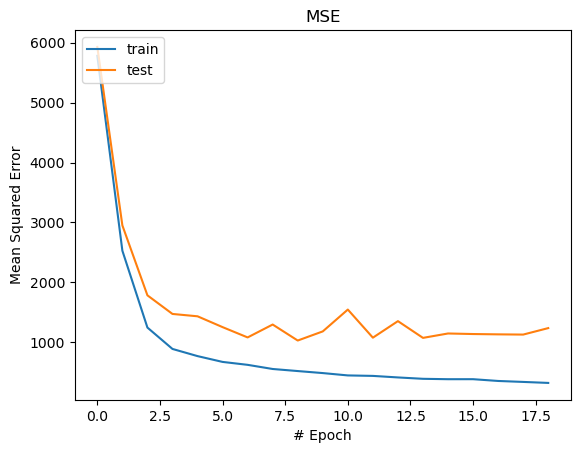

In [195]:
plt.plot(history.history['mse'])  # Use 'mse' instead of 'mean_squared_error'
plt.plot(history.history['val_mse'])  # Use 'val_mse' instead of 'val_mean_squared_error'
plt.title('MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('# Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Results on Train Set

In [196]:
scores = model.evaluate(x_train, y_train, verbose=1, batch_size=200)
print('MSE: {}'.format(scores[1]))

79/79 [==============================] - 2s 27ms/step - loss: 432.9818 - mse: 432.9818
MSE: 432.98175048828125


# Results on Test Set

In [197]:
scores_test = model.evaluate(x_test, y_test, verbose=2)
print('MSE: {}'.format(scores_test[1]))

4/4 - 0s - loss: 698.8817 - mse: 698.8817 - 51ms/epoch - 13ms/step
MSE: 698.8817138671875


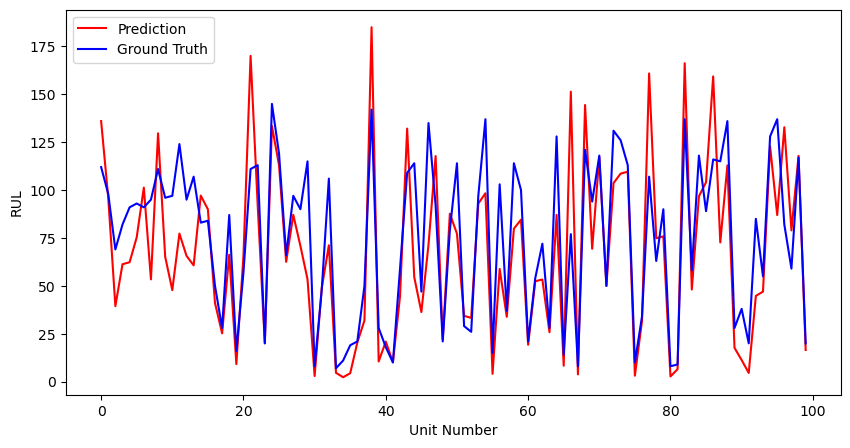

In [198]:
y_pred_test = model.predict(x_test, verbose=0)

plt.figure(figsize=(10,5))
plt.plot(y_pred_test, color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Ground Truth')
plt.ylabel("RUL")
plt.xlabel("Unit Number")
plt.legend(loc='upper left')
plt.show()